# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Читаем файл
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Посчитаем количество имевших задолженность в зависимости от количества детей.**

In [24]:
children_dept = pd.pivot_table(data, 
                               index=['children'], 
                               values='debt', 
                               aggfunc=['sum', 'count', 'mean']) # сформируем сводную таблицу, выведем кол-во должников 
                            # по категориям кол-ва детей, и проанализируем их отношение к общему кол-ву. 
children_dept


,sum,count,mean
,debt,debt,debt
children,,,
0,1063,14091,0.075438
1,444,4808,0.092346
2,194,2052,0.094542
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


**Добавим столбец с процентом невозврата в категории.**

In [25]:
children_dept['non_return_percent'] = round(children_dept['mean'] * 100, 2) 
children_dept

,sum,count,mean,non_return_percent
,debt,debt,debt,
children,,,,
0,1063,14091,0.075438,7.54
1,444,4808,0.092346,9.23
2,194,2052,0.094542,9.45
3,27,330,0.081818,8.18
4,4,41,0.097561,9.76
5,0,9,0.000000,0.00


**Добавим столбец с отношением общего кол-ва в категории к общему количеству клиентов. Чтобы понять какую долю эти клиенты составляют в общем количестве клиентов.**

In [26]:
children_dept['percent_of_dept'] = round(data.groupby('children')['debt'].count() / data.groupby('children')['debt'].count().sum() * 100, 2)
children_dept

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
children,,,,,
0,1063,14091,0.075438,7.54,66.06
1,444,4808,0.092346,9.23,22.54
2,194,2052,0.094542,9.45,9.62
3,27,330,0.081818,8.18,1.55
4,4,41,0.097561,9.76,0.19
5,0,9,0.000000,0.00,0.04


**Отсортируем столбец с процентами невернувших в категории по убыванию.**

In [27]:
children_dept.sort_values('non_return_percent', ascending=False) 

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
children,,,,,
4,4,41,0.097561,9.76,0.19
2,194,2052,0.094542,9.45,9.62
1,444,4808,0.092346,9.23,22.54
3,27,330,0.081818,8.18,1.55
0,1063,14091,0.075438,7.54,66.06
5,0,9,0.000000,0.00,0.04


Визуализируем зависимость.

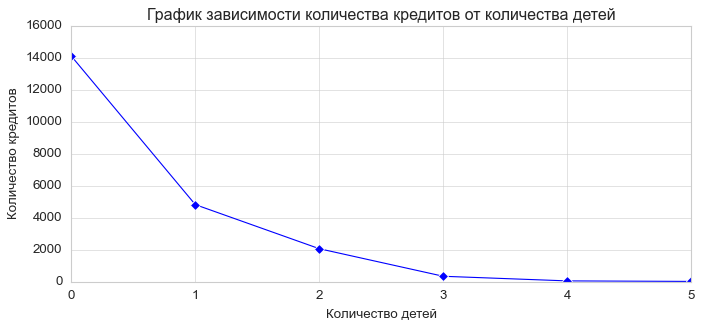

In [28]:
# готовим данные для подсчёта кредитов в зависимости от количества детей
data_ch = data.groupby('children')[['children']].count()
# применяем стиль whitegrid из библиотеки seaborn
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим линейный график средствами seaborn
sns.lineplot(x=data_ch.index, y='children', data=data_ch, marker='D')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
# отображаем график на экране
plt.show()

**Из проведенного анализа видно, что присутствует зависимость задолженности от количества детей у заемщиков. Но из-за того, что группы клиентов с 3 и более детьмы слишком малочисленны (менее 1,6% от общего объема клиентов) учитывать данные по ним не совсем корректно.**

**Таким образом можно сделать следующий вывод:**

**- самый большой процент невозврата у клиентов с 2-мя детьми, но доля таких клиентов в общем объеме составляет около 10%**

**- чуть ниже процент невозврата у клиентов 1-м ребенком. И надо обратить внимание, что доля клентов с 1 ребенком составляет почти 23% от всех клиентов;**

**- ниже всего процент невозврата у клиентов без детей. И их доля от общего объема самая большая - более 66%**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Проверим соотносится ли показатель family_status_id к family_status, чтобы быть уверенным, что можно фильтровать по любому из пареметров.**

In [29]:
data[['family_status', 'family_status_id']].drop_duplicates()

,family_status,family_status_id
0,женат / замужем,0
4,гражданский брак,1
18,вдовец / вдова,2
19,в разводе,3
24,Не женат / не замужем,4


**Мы увидели, что значения в столбцах family_status и family_status_id сопоставимы.**

**Сформируем сводную таблицу, выведем кол-во должников по категориям в зависимости от семейного положения, и проанализируем их отношение к общему кол-ву.**


In [30]:
fstatus_dept = pd.pivot_table(data, 
                              index=['family_status'], 
                              values='debt', 
                              aggfunc=['sum', 'count', 'mean']) 
fstatus_dept

,sum,count,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,273,2796,0.097639
в разводе,84,1189,0.070648
вдовец / вдова,63,951,0.066246
гражданский брак,385,4134,0.093130
женат / замужем,927,12261,0.075606


**Добавим столбец с процентом невозврата в категории.**

In [31]:
fstatus_dept['non_return_percent'] = round(fstatus_dept['mean'] * 100, 2)
fstatus_dept

,sum,count,mean,non_return_percent
,debt,debt,debt,
family_status,,,,
Не женат / не замужем,273,2796,0.097639,9.76
в разводе,84,1189,0.070648,7.06
вдовец / вдова,63,951,0.066246,6.62
гражданский брак,385,4134,0.093130,9.31
женат / замужем,927,12261,0.075606,7.56


**Добавим столбец с отношением общего кол-ва в категории к общему количеству клиентов. Чтобы понять какую долю эти клиенты составляют в общем количестве клиентов.**

In [32]:
fstatus_dept['percent_of_dept'] = round(data.groupby('family_status')['debt'].count() / data.groupby('family_status')['debt'].count().sum() * 100, 2)
fstatus_dept

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
family_status,,,,,
Не женат / не замужем,273,2796,0.097639,9.76,13.11
в разводе,84,1189,0.070648,7.06,5.57
вдовец / вдова,63,951,0.066246,6.62,4.46
гражданский брак,385,4134,0.093130,9.31,19.38
женат / замужем,927,12261,0.075606,7.56,57.48


**Отсортируем столбец с процентами невернувших в категории по убыванию.**

In [33]:
fstatus_dept.sort_values('non_return_percent', ascending=False) 

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
family_status,,,,,
Не женат / не замужем,273,2796,0.097639,9.76,13.11
гражданский брак,385,4134,0.093130,9.31,19.38
женат / замужем,927,12261,0.075606,7.56,57.48
в разводе,84,1189,0.070648,7.06,5.57
вдовец / вдова,63,951,0.066246,6.62,4.46


**Из проведенного анализа нет четкого понимания о присутствии зависимости невозврата в срок и семейного положения. Попробуем сгруппировать категории в подкатегории - состояли в браке и не состояли.**

In [34]:
def categorize_fstat(ind):
    try:
        if 'Не женат / не замужем' in ind or 'гражданский брак' in ind:
            return 'не состояли в браке'
        elif 'женат / замужем' in ind or 'в разводе' in ind or 'вдовец / вдова' in ind:
            return 'состояли в браке'
    except:
        return 'проверить'
    
data['fstatus_category'] = data['family_status'].apply(categorize_fstat)

In [35]:
fstatus_dept = pd.pivot_table(data, 
                              index=['fstatus_category'], 
                              values='debt', 
                              aggfunc=['sum', 'count', 'mean']) 
fstatus_dept

,sum,count,mean
,debt,debt,debt
fstatus_category,,,
не состояли в браке,658,6930,0.094949
состояли в браке,1074,14401,0.074578


In [36]:
fstatus_dept['non_return_percent'] = round(fstatus_dept['mean'] * 100, 2)
fstatus_dept

,sum,count,mean,non_return_percent
,debt,debt,debt,
fstatus_category,,,,
не состояли в браке,658,6930,0.094949,9.49
состояли в браке,1074,14401,0.074578,7.46


**ВЫВОД:**

По итогам проведенного анализа можно сделать вывод, что есть прямая зависимость между семейным положением и возвратом кредита в срок - у клиентов не состоявших в браке процент невозврата по кредиту больше, чем у людей состоящих(вших) в браке.**

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Проверим, есть ли зависимость возврата от уровня дохода.**

**Сформируем сводную таблицу, выведем кол-во должников по категориям в зависимости от уровня дохода, и проанализируем их отношение к общему кол-ву.**

In [37]:
income_dept = pd.pivot_table(data, 
                              index=['total_income_category'], 
                              values='debt', 
                              aggfunc=['sum', 'count', 'mean']) 
income_dept

,sum,count,mean
,debt,debt,debt
total_income_category,,,
A,2,25,0.080000
B,354,5014,0.070602
C,1353,15921,0.084982
D,21,349,0.060172
E,2,22,0.090909


**Добавим столбец с процентом невозврата в категории.**

In [38]:
income_dept['non_return_percent'] = round(income_dept['mean'] * 100, 2)
income_dept

,sum,count,mean,non_return_percent
,debt,debt,debt,
total_income_category,,,,
A,2,25,0.080000,8.00
B,354,5014,0.070602,7.06
C,1353,15921,0.084982,8.50
D,21,349,0.060172,6.02
E,2,22,0.090909,9.09


**Добавим столбец с отношением общего кол-ва в категории к общему количеству клиентов. Чтобы понять какую долю эти клиенты составляют в общем количестве клиентов.**

In [39]:
income_dept['percent_of_dept'] = round(data.groupby('total_income_category')['debt'].count() / data.groupby('total_income_category')['debt'].count().sum() * 100, 2)
income_dept

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
total_income_category,,,,,
A,2,25,0.080000,8.00,0.12
B,354,5014,0.070602,7.06,23.51
C,1353,15921,0.084982,8.50,74.64
D,21,349,0.060172,6.02,1.64
E,2,22,0.090909,9.09,0.10


**Отсортируем столбец с процентами невернувших в категории по убыванию.**

In [40]:
income_dept.sort_values('non_return_percent', ascending=False) 

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
total_income_category,,,,,
E,2,22,0.090909,9.09,0.10
C,1353,15921,0.084982,8.50,74.64
A,2,25,0.080000,8.00,0.12
B,354,5014,0.070602,7.06,23.51
D,21,349,0.060172,6.02,1.64


**ВЫВОД:**

Ввиду того, что группы клиентов категорий A, D, E слишком малочисленны, делать вывод на основании данных по ним не совсем корректно.

Таким образом можно сделать вывод, что просматривается зависимость возврата кредита от уровня дохода.

Так мы видим, что:

- у клиентов с уровнем дохода категории C (50001-200000) выше процент невозврата - 8,5%, так же стоит учесть то, что доля клиентов такой категории составляет 74,64% от общего количества клиентов;

- у клиентов категории В (200001-1000000) процент невозврата меньше, и доля таких клиентов от общего объема составляет около 23,5%.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Проверим, есть ли зависимость возврата от цели кредита. Сформируем сводную таблицу, выведем кол-во должников по категориям и проанализируем их отношение к общему кол-ву.

In [41]:
purpose_dept = pd.pivot_table(data, 
                              index=['purpose_category'], 
                              values='debt', 
                              aggfunc=['sum', 'count', 'mean']) 
purpose_dept

,sum,count,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,400,4279,0.093480
операции с недвижимостью,780,10751,0.072551
получение образования,369,3988,0.092528
проведение свадьбы,183,2313,0.079118


**Добавим столбец с процентом невозврата в категории.**

In [42]:
purpose_dept['non_return_percent'] = round(purpose_dept['mean'] * 100, 2)
purpose_dept

,sum,count,mean,non_return_percent
,debt,debt,debt,
purpose_category,,,,
операции с автомобилем,400,4279,0.093480,9.35
операции с недвижимостью,780,10751,0.072551,7.26
получение образования,369,3988,0.092528,9.25
проведение свадьбы,183,2313,0.079118,7.91


**Добавим столбец с отношением общего кол-ва в категории к общему количеству клиентов. Чтобы понять какую долю эти клиенты составляют в общем количестве клиентов.**

In [43]:
purpose_dept['percent_of_dept'] = round(data.groupby('purpose_category')['debt'].count() / data.groupby('purpose_category')['debt'].count().sum() * 100, 2)
purpose_dept

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
purpose_category,,,,,
операции с автомобилем,400,4279,0.093480,9.35,20.06
операции с недвижимостью,780,10751,0.072551,7.26,50.40
получение образования,369,3988,0.092528,9.25,18.70
проведение свадьбы,183,2313,0.079118,7.91,10.84


**Отсортируем столбец с процентами невернувших в категории по убыванию.**

In [44]:
purpose_dept.sort_values('non_return_percent', ascending=False) 

,sum,count,mean,non_return_percent,percent_of_dept
,debt,debt,debt,,
purpose_category,,,,,
операции с автомобилем,400,4279,0.093480,9.35,20.06
получение образования,369,3988,0.092528,9.25,18.70
проведение свадьбы,183,2313,0.079118,7.91,10.84
операции с недвижимостью,780,10751,0.072551,7.26,50.40


**ВЫВОД:**
Проведя анализ можно сделать вывод, что:

- процент невозврата кредита, приобретенного для целей операции с недвижимостью и образование примерно одинаковый, и составляет около 9,5%, в общем объеме клиентов доля тоже примерно одинаковая - 19-20%;

- на проведение свадьбы процент невозврата ниже и составялет чуть меньше 8%, при этом доля таких клиентов в общем объеме меньше всего и составляет около 11%;

- меньше всего процент невозврата кредита преобретаемого для опреций с недвижимостью - около 7,3% и доля таких клиентов в общем объеме составляет более 50%

Причинами припусков в исходных данных могут быть:

- нежелание опрашиваемого предоставить информацию;

- возможно технические ошибки при выгрузке данных;

- человеческий фактор - сотрудник банка не заполнил все поля при анкетировании.

Заполнять пропуски для количественных переменных лучше медианным значением, так как в данных могут быть значения сильно выделяющиеся из общей массы. Медиана как-бы нивелирует разрывы в данных. Тогда как среднее значение может выдать некорректные для дальнейшего анализа цифры.

**3.5 Связь между доходом и образованием**

Теперь ответим на вопрос, влияет ли образование на уровень дохода и наличие задолженности. Попробуем отразить всё на одном графике. 

Построим столбчатую диаграмму. Чтобы сформировать столбцы, сгруппируем данные по категориям образования и вычислим медианный доход. Параметру `hue` метода `barplot()` передадим категории задолженности.

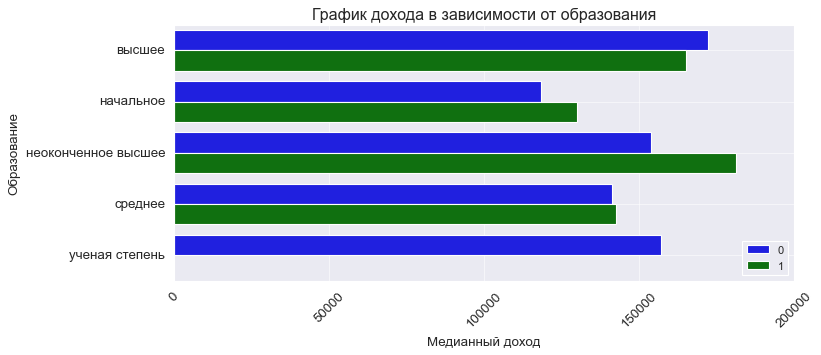

In [45]:
# группируем данные по образованию и задолженности и считаем медианный доход
data_ed = data.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()
# используем стиль dark из библиотеки seaborn
sns.set_style('dark')
# назначаем размер графика
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='total_income', y='education', data=data_ed, hue='debt')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

Должниками бывают люди и с высшим, и с начальным образованием. Однако среди людей с учёной степенью должников нет вообще.

### Поиск закономерностей

Проанализируем данные в столбце со стажем days_employed. Построим график scatter (англ. «разброс, рассеивание»), чтобы отобразить зависимость стажа от дохода. Такие графики аналитики обычно строят для себя, поэтому их можно не оформлять. Укажем лишь несколько параметров, чтобы график получился более контрастным.

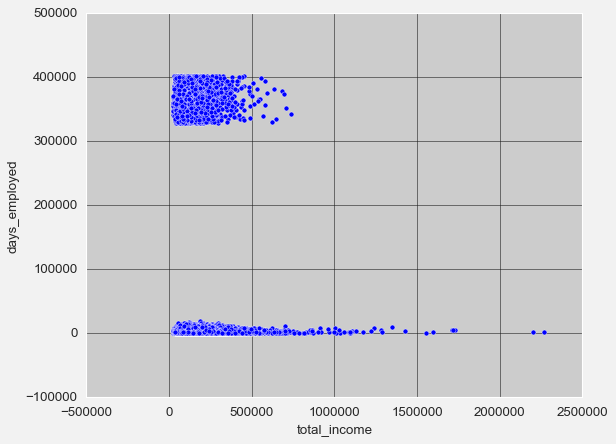

In [46]:
# задаём параметры графика
sns.set_style('darkgrid',
              {'axes.facecolor': '0.8',
               'grid.color': '0.1',
               'figure.facecolor': '0.95'})
# строим график scatter средствами seaborn
sns.scatterplot(x='total_income', y='days_employed', data=data)
# отображаем график на экране
plt.show()

Стала видна странность: значения трудового стажа находятся либо около нуля и небольших значений, либо в промежутке от 300000 до 400000. О таких аномалиях стоит сообщать заказчику: возможно, это ошибка выгрузки.

### Шаг 4: общий вывод.

**Наиболее привлекательнымм клиентами для банка считаются вдовцы или люди, находящиеся в разводе с доходом 30000-50000, приобретаемые кредит для операций с недвижимостью. Менее привлекательными являются не состоящие в официальном браке с 1 или 2 детьми, доходом до 30000, берущие кредит на преобретение автомобиля.**